In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import cv2
import imutils
from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [2]:
gliomaDir = "../dataset/Training/glioma/"
gliomaList = os.listdir(gliomaDir)
gliomaSize = len(gliomaList)

meningiomaDir = "../dataset/Training/meningioma/"
meningiomaList = os.listdir(meningiomaDir)
meningiomaSize = len(meningiomaList)

notumorDir = "../dataset/Training/notumor/"
notumorList = os.listdir(notumorDir)
notumorSize = len(notumorList)

pituitaryDir = "../dataset/Training/pituitary/"
pituitaryList = os.listdir(pituitaryDir)
pituitarySize = len(pituitaryList)

print (f"Glioma num is : "    ,gliomaSize)               
print (f"Meningioma num is : ",meningiomaSize)               
print (f"Notumor num is : "   ,notumorSize)               
print (f"Pituitary num is : " ,pituitarySize)               

Glioma num is :  1521
Meningioma num is :  1539
Notumor num is :  1595
Pituitary num is :  1557


Text(0.5, 1.0, 'Count of Brain Tumor Images')

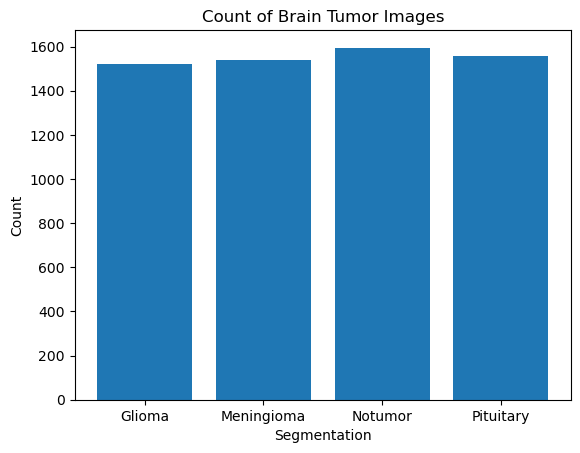

In [3]:
data = {'Glioma':gliomaSize,'Meningioma':meningiomaSize,'Notumor':notumorSize,'Pituitary':pituitarySize}
plt.bar(data.keys(),data.values())
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title("Count of Brain Tumor Images")

In [4]:
### The data are balanced to some extent, but for parctice, let us make data augmentation

In [5]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [6]:
def dataAugmentation(directory,numberOfnewImages,newname,initialNumber):
    generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                                   brightness_range=(0.3, 1.0),horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    counter = 0;
    number = int(initialNumber)
    for imageName in os.listdir(directory):
        #read the image
        image = cv2.imread(directory + '/' + imageName)
        image = image.reshape((1,) + image.shape) # Reshape the image to a format compatible with Keras 
        save_prefix  = newname + str(number)
        # print(newname)
        # print(number)
        # print(save_prefix)
        # print('----------')
        for batch in generator.flow(x = image, batch_size = 1, save_to_dir = directory, save_prefix = save_prefix, save_format = "jpg"):
            break
        counter+=1
        number+=1
        if(counter>=numberOfnewImages):
            break


In [7]:
# dataAugmentation(gliomaDir,200,'Tr-gl_',gliomaSize)
# dataAugmentation(meningiomaDir,200,'Tr-me_',meningiomaSize)
# dataAugmentation(pituitaryDir,100,'Tr-pi_',pituitarySize)

In [8]:
gliomaList = os.listdir(gliomaDir)
gliomaSize = len(gliomaList)

meningiomaList = os.listdir(meningiomaDir)
meningiomaSize = len(meningiomaList)

notumorList = os.listdir(notumorDir)
notumorSize = len(notumorList)

pituitaryList = os.listdir(pituitaryDir)
pituitarySize = len(pituitaryList)

print (f"Glioma num is : "    ,gliomaSize)               
print (f"Meningioma num is : ",meningiomaSize)               
print (f"Notumor num is : "   ,notumorSize)               
print (f"Pituitary num is : " ,pituitarySize)   

Glioma num is :  1521
Meningioma num is :  1539
Notumor num is :  1595
Pituitary num is :  1557


Text(0.5, 1.0, 'Count of Brain Tumor Images')

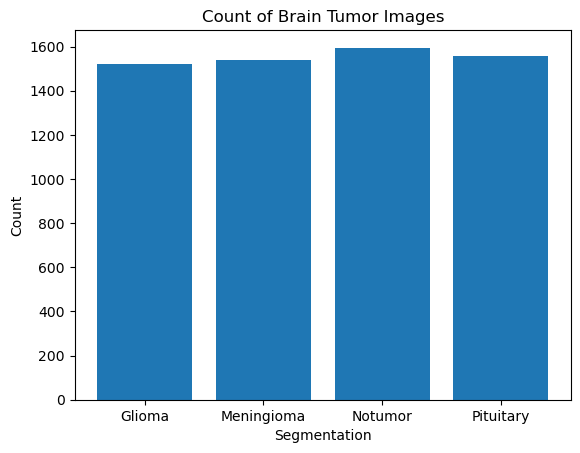

In [9]:
data = {'Glioma':gliomaSize,'Meningioma':meningiomaSize,'Notumor':notumorSize,'Pituitary':pituitarySize}
plt.bar(data.keys(),data.values())
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title("Count of Brain Tumor Images")

In [23]:
def crop_images(image):
    # convert to gray scale
    newImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # applay GaussianBlur for noise cancilation
    newImage = cv2.GaussianBlur(newImage,(5,5),0)

    thres = cv2.threshold(newImage, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)

    #Contour Detection
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    return new_image


In [24]:
gliomaDir_train = '../dataset/Training/glioma/'
gliomaDir_test = '../dataset/Testing/glioma/'
gliomaDir_valid = '../dataset/Validating/glioma/'

for filename in os.listdir(gliomaDir_train):
    img = cv2.imread(gliomaDir_train + filename)
    img = crop_images(img)
    cv2.imwrite(gliomaDir_train + filename, img)
for filename in os.listdir(gliomaDir_test):
    img = cv2.imread(gliomaDir_test + filename)
    img = crop_images(img)
    cv2.imwrite(gliomaDir_valid + filename, img)
for filename in os.listdir(gliomaDir_test):
    img = cv2.imread(gliomaDir_valid + filename)
    img = crop_images(img)
    cv2.imwrite(gliomaDir_valid + filename, img)
    
meningiomaDir_train = '../dataset/Training/meningioma/'
meningiomaDir_test = '../dataset/Testing/meningioma/'
meningiomaDir_valid = '../dataset/Validating/meningioma/'

for filename in os.listdir(meningiomaDir_train):
    img = cv2.imread(meningiomaDir_train + filename)
    img = crop_images(img)
    cv2.imwrite(meningiomaDir_train + filename, img)
for filename in os.listdir(meningiomaDir_test):
    img = cv2.imread(meningiomaDir_test + filename)
    img = crop_images(img)
    cv2.imwrite(meningiomaDir_test + filename, img)
for filename in os.listdir(meningiomaDir_valid):
    img = cv2.imread(meningiomaDir_valid + filename)
    img = crop_images(img)
    cv2.imwrite(meningiomaDir_valid + filename, img)
    
notumorDir_train = '../dataset/Training/notumor/'
notumorDir_test = '../dataset/Testing/notumor/'
notumorDir_valid = '../dataset/Validating/notumor/'

for filename in os.listdir(notumorDir_train):
    img = cv2.imread(notumorDir_train + filename)
    img = crop_images(img)
    cv2.imwrite(notumorDir_train + filename, img)
for filename in os.listdir(notumorDir_test):
    img = cv2.imread(notumorDir_test + filename)
    img = crop_images(img)
    cv2.imwrite(notumorDir_test + filename, img)
for filename in os.listdir(notumorDir_valid):
    img = cv2.imread(notumorDir_valid + filename)
    img = crop_images(img)
    cv2.imwrite(notumorDir_valid + filename, img)

pituitaryDir_train = '../dataset/Training/pituitary/'
pituitaryDir_test = '../dataset/Testing/pituitary/'
pituitaryDir_valid = '../dataset/Validating/pituitary/'

for filename in os.listdir(pituitaryDir_train):
    img = cv2.imread(pituitaryDir_train + filename)
    img = crop_images(img)
    cv2.imwrite(pituitaryDir_train + filename, img)
for filename in os.listdir(pituitaryDir_test):
    img = cv2.imread(pituitaryDir_test + filename)
    img = crop_images(img)
    cv2.imwrite(pituitaryDir_test + filename, img)
for filename in os.listdir(pituitaryDir_valid):
    img = cv2.imread(pituitaryDir_valid + filename)
    img = crop_images(img)
    cv2.imwrite(pituitaryDir_valid + filename, img)

In [ ]:
# splited the data manually to be 80% 10% 10% training testing validating

In [ ]:
#image loading 

In [2]:
import os
import cv2
from sklearn.utils import shuffle

def load_data(dirlist, imageSize):
    X = []
    y = []
    w, h = imageSize
    for dir in dirlist:
        for filename in os.listdir(dir):
            image = cv2.imread(os.path.join(dir, filename))
            if image is not None:  # Checking if the image was read successfully
                image = cv2.resize(src=image, dsize=(w, h), interpolation=cv2.INTER_CUBIC)
                image = image / 255.0  # Normalize pixel values
                if "notumor" in dir:
                    X.append(image)
                    y.append(0)
                elif "glioma" in dir:
                    X.append(image)
                    y.append(1)
                elif "meningioma" in dir:
                    X.append(image)
                    y.append(2)
                elif "pituitary" in dir:
                    X.append(image)
                    y.append(3)
    X, y = shuffle(X, y)
    return X, y

In [3]:
dirlist = ["../dataset/Training/notumor/", "../dataset/Training/glioma/", "../dataset/Training/meningioma/", "../dataset/Training/pituitary/"]
size = (240, 240)
X_training, y_training = load_data(dirlist, size)

In [4]:
X_training = np.array(X_training)
y_training = np.array(y_training)

In [5]:
dirlist = ["../dataset/Testing/notumor/", "../dataset/Testing/glioma/", "../dataset/Testing/meningioma/", "../dataset/Testing/pituitary/"]
size = (240, 240)
X_testing, y_testing = load_data(dirlist, size)

In [6]:
dirlist = ["../dataset/Validating/notumor/", "../dataset/Validating/glioma/", "../dataset/Validating/meningioma/", "../dataset/Validating/pituitary/"]
size = (240, 240)
X_validating, y_validating = load_data(dirlist, size)

In [7]:
X_testing = np.array(X_testing)
y_testing = np.array(y_testing)
X_validating = np.array(X_validating)
y_validating = np.array(y_validating)

In [ ]:
# model building

In [3]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = train_data_gen.flow_from_directory('../dataset/Training/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 6212 images belonging to 4 classes.


In [5]:
test_generator = test_data_gen.flow_from_directory('../dataset/Testing/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 603 images belonging to 4 classes.


In [6]:
valid_generator = valid_data_gen.flow_from_directory('../dataset/Validating/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 859 images belonging to 4 classes.


In [7]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}
print(class_name)

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


In [53]:
# Load pre-trained VGG19 application model
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained weights
base_model.trainable = False

# Flatten the output of VGG19 base
flatten_layer = Flatten()(base_model.output)

# Add my own classification layers
class_1 = Dense(4608, activation = 'relu')(flatten_layer)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)

# Output layer
output_layer = Dense(4, activation='softmax')(class_2)

# Create model
model_1 = Model(inputs=base_model.input, outputs=output_layer)

In [54]:
# callback
filepath = 'model_1.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=8)
mcp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
rp = ReduceLROnPlateau(monitor='val_accuarcy', patience=5, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [55]:
# optimizer
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
adam = Adam(learning_rate=0.0001)
model_1.compile( optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model_1.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,948,676 (537.68 MB)

 Trainable params: 120,924,292 (461.29 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/2


C:\Users\AUC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 230s 24s/step - accuracy: 0.2967 - loss: 1.4637 - val_accuracy: 0.2817 - val_loss: 1.4665 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\AUC\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 239s 26s/step - accuracy: 0.3029 - loss: 1.4160 - val_accuracy: 0.3795 - val_loss: 1.3407 - learning_rate: 1.0000e-04


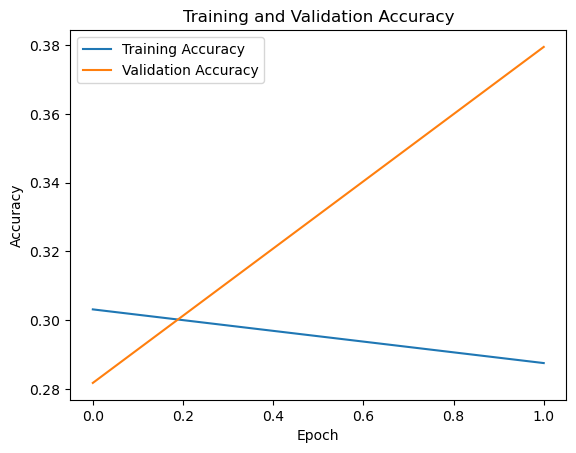

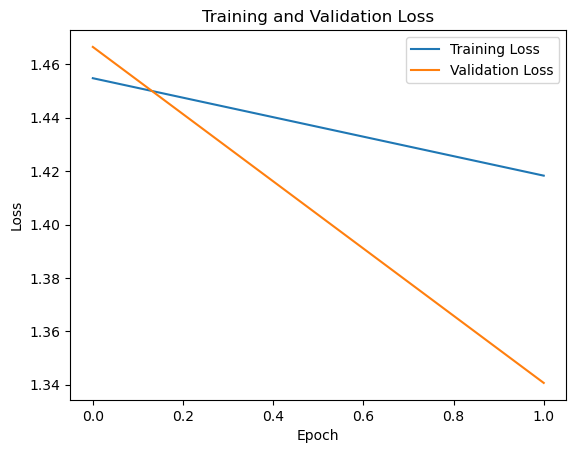

In [13]:
from tensorflow.keras.callbacks import TensorBoard
# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs")
# Train the model with TensorBoard callback
history = model_1.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es, rp, tensorboard_callback], validation_data=valid_generator)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model_1.save_weights(filepath="../model_weights/vgg19_model_1.weights.h5", overwrite=True)

In [19]:
model_1.load_weights("../model_weights/vgg19_model_1.weights.h5")
vgg_val_eval_1 = model_1.evaluate(valid_generator)
vgg_test_eval_1 = model_1.evaluate(test_generator)
print(f'Validation Loss: {vgg_val_eval_1[0]}')
print(f'Validation Acc: {vgg_val_eval_1[1]}')
print(f'Testing Loss: {vgg_test_eval_1[0]}')
print(f'Testing Acc: {vgg_test_eval_1[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 427s 16s/step - accuracy: 0.3799 - loss: 1.3342
19/19 ━━━━━━━━━━━━━━━━━━━━ 494s 26s/step - accuracy: 0.2858 - loss: 1.4317
Validation Loss: 1.3406873941421509
Validation Acc: 0.3795110583305359
Testing Loss: 1.4337852001190186
Testing Acc: 0.2852404713630676


In [ ]:
# Increamental unfreezing and fine tunign

In [57]:
#building new model
base_model = VGG19(include_top = False, input_shape=(240,240,3))

# Flatten the output of VGG19 base
flatten_layer = Flatten()(base_model.output)

# Add my own classification layers
class_1 = Dense(4608, activation = 'relu')(flatten_layer)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)

# Output layer
output_layer = Dense(4, activation='softmax')(class_2)

# Create model
model_2 = Model(inputs=base_model.input, outputs=output_layer)
model_2.load_weights('../model_weights/vgg19_model_1.weights.h5')

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [58]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_2.compile( optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_2.summary())

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,948,676 (537.68 MB)

 Trainable params: 125,643,908 (479.29 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 1012s 104s/step - accuracy: 0.3259 - loss: 1.4209 - val_accuracy: 0.4400 - val_loss: 1.3075 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 946s 102s/step - accuracy: 0.3123 - loss: 1.4121 - val_accuracy: 0.4563 - val_loss: 1.2737 - learning_rate: 1.0000e-04


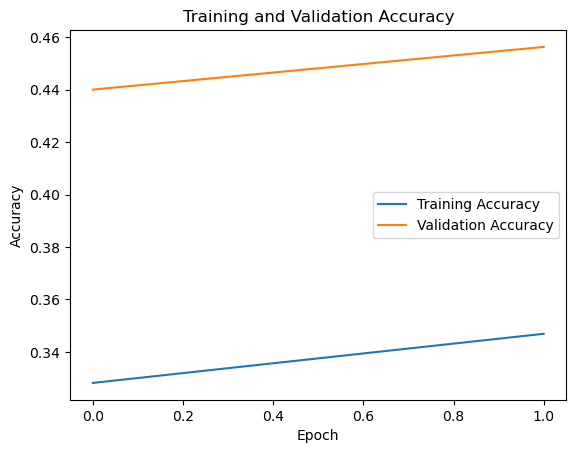

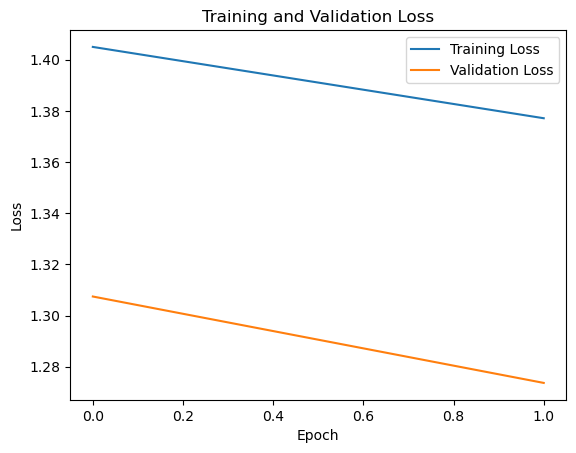

In [27]:
from tensorflow.keras.callbacks import TensorBoard
# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs")
# Train the model with TensorBoard callback
history = model_2.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es, rp, tensorboard_callback], validation_data=valid_generator)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model_2.save_weights(filepath="../model_weights/vgg19_model_2.weights.h5", overwrite=True)

In [29]:
model_2.load_weights("../model_weights/vgg19_model_2.weights.h5")
vgg_val_eval_2 = model_2.evaluate(valid_generator)
vgg_test_eval_2 = model_2.evaluate(test_generator)
print(f'Validation Loss: {vgg_val_eval_2[0]}')
print(f'Validation Acc: {vgg_val_eval_2[1]}')
print(f'Testing Loss: {vgg_test_eval_2[0]}')
print(f'Testing Acc: {vgg_test_eval_2[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 176s 7s/step - accuracy: 0.4529 - loss: 1.2771
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.2910 - loss: 1.4039
Validation Loss: 1.2736871242523193
Validation Acc: 0.4563445746898651
Testing Loss: 1.3898133039474487
Testing Acc: 0.3067993223667145


In [ ]:
# unfreeze all the layers

In [59]:
#building new model
base_model = VGG19(include_top = False, input_shape=(240,240,3))

# Flatten the output of VGG19 base
flatten_layer = Flatten()(base_model.output)

# Add my own classification layers
class_1 = Dense(4608, activation = 'relu')(flatten_layer)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)

# Output layer
output_layer = Dense(4, activation='softmax')(class_2)

# Create model
model_3 = Model(inputs=base_model.input, outputs=output_layer)
model_3.load_weights('../model_weights/vgg19_model_2.weights.h5')

In [60]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_3.compile( optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_3.summary())

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,948,676 (537.68 MB)

 Trainable params: 140,948,676 (537.68 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 253s 27s/step - accuracy: 0.3766 - loss: 1.3216 - val_accuracy: 0.4121 - val_loss: 1.3009 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 291s 31s/step - accuracy: 0.3525 - loss: 1.3444 - val_accuracy: 0.4633 - val_loss: 1.2342 - learning_rate: 1.0000e-04


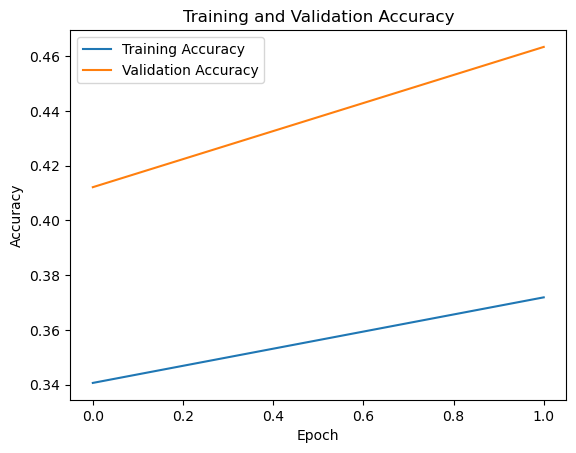

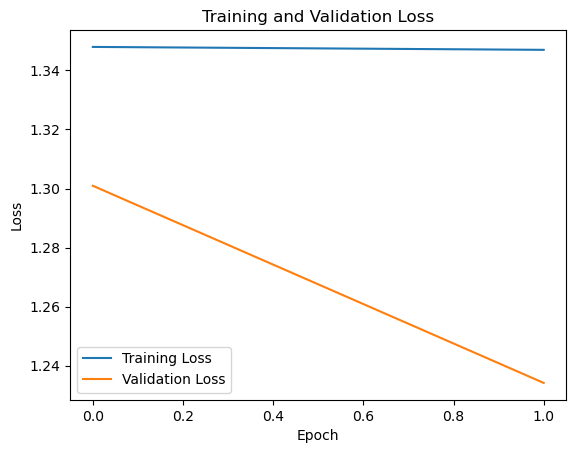

In [33]:
from tensorflow.keras.callbacks import TensorBoard
# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs")
# Train the model with TensorBoard callback
history = model_3.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es, rp, tensorboard_callback], validation_data=valid_generator)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
model_3.save_weights(filepath="../model_weights/vgg19_model_3.weights.h5", overwrite=True)

In [35]:
model_3.load_weights("../model_weights/vgg19_model_3.weights.h5")
vgg_val_eval_3 = model_3.evaluate(valid_generator)
vgg_test_eval_3 = model_3.evaluate(test_generator)
print(f'Validation Loss: {vgg_val_eval_3[0]}')
print(f'Validation Acc: {vgg_val_eval_3[1]}')
print(f'Testing Loss: {vgg_test_eval_3[0]}')
print(f'Testing Acc: {vgg_test_eval_3[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 211s 8s/step - accuracy: 0.4371 - loss: 1.2574
19/19 ━━━━━━━━━━━━━━━━━━━━ 143s 8s/step - accuracy: 0.3747 - loss: 1.3534
Validation Loss: 1.2341532707214355
Validation Acc: 0.4633294641971588
Testing Loss: 1.3625330924987793
Testing Acc: 0.3615257143974304


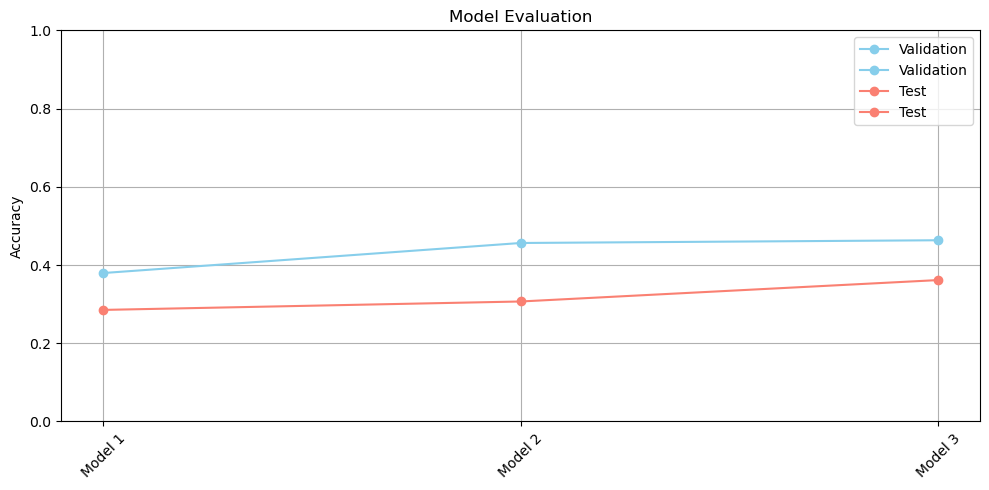

In [38]:
# Evaluation results
val_eval = [vgg_val_eval_1, vgg_val_eval_2, vgg_val_eval_3]
test_eval = [vgg_test_eval_1, vgg_test_eval_2, vgg_test_eval_3]

# Models labels
models = ['Model 1', 'Model 2', 'Model 3']

# Plotting
plt.figure(figsize=(10, 5))

# Validation results
plt.plot(models, val_eval, marker='o', linestyle='-', color='skyblue', label='Validation')
# Test results
plt.plot(models, test_eval, marker='o', linestyle='-', color='salmon', label='Test')

plt.title('Model Evaluation')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()